In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xclim 
import xarray as xr
from pathlib import Path
# import dask 
import os 

In [14]:
from Barcelona import indicators_Barcelona as iB 

In [4]:
import numpy as np 
import xarray as xr

import geopandas as gpd


import rioxarray
import xarray
from shapely.geometry import mapping


In [5]:
path1 = '/mnt/stg/climate/CHELSA/CHELSA_EUR11/obs/daily/tasmax/'
path2 = '/mnt/stg/climate/CHELSA/CHELSA_EUR11/obs/daily/tasmin/'
outpath = '/mnt/stg/climate/CHELSA/CHELSA_EUR11/indicators/heatwave_length/'

# Catalonia
lat_min, lat_max = 40.3, 42.6
lon_min, lon_max = -1.3, 3.4

# nc_files = list(path_data.glob("*_V1.1.nc") )
# nc_files


In [6]:
years = range(1990, 2006)

data_dir = '/mnt/stg/climate/CHELSA/CHELSA_EUR11/obs/daily/tasmax/' 
datasets = []

for year in years:
    file_path = os.path.join(data_dir, f"CHELSA_EUR11_tasmax_day_{year}_V1.1.nc")
    try:
        with xr.open_dataset(file_path, engine="netcdf4") as ds:
            # Subset before loading into memory
            ds_subset = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
            
            # Actually load data into memory now
            datasets.append(ds_subset.load())
            print(f"Year {year}: loaded")
    except Exception as e:
        print(f"Skipping year {year}: {e}")

# Concatenate all loaded subsets along the time dimension
combined_tx = xr.concat(datasets, dim="time")


Year 1990: loaded
Year 1991: loaded
Year 1992: loaded
Year 1993: loaded
Year 1994: loaded
Year 1995: loaded
Year 1996: loaded
Year 1997: loaded
Year 1998: loaded
Year 1999: loaded
Year 2000: loaded
Year 2001: loaded
Year 2002: loaded
Year 2003: loaded
Year 2004: loaded
Year 2005: loaded


In [7]:
years = range(1990, 2006)

data_dir = '/mnt/stg/climate/CHELSA/CHELSA_EUR11/obs/daily/tasmin/' 
datasets = []

for year in years:
    file_path = os.path.join(data_dir, f"CHELSA_EUR11_tasmin_day_{year}_V1.1.nc")
    try:
        with xr.open_dataset(file_path, engine="netcdf4") as ds:
            # Subset before loading into memory
            ds_subset = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
            
            # Actually load data into memory now
            datasets.append(ds_subset.load())
            print(f"Year {year}: loaded")
    except Exception as e:
        print(f"Skipping year {year}: {e}")

# Concatenate all loaded subsets along the time dimension
combined_tn = xr.concat(datasets, dim="time")


Year 1990: loaded
Year 1991: loaded
Year 1992: loaded
Year 1993: loaded
Year 1994: loaded
Year 1995: loaded
Year 1996: loaded
Year 1997: loaded
Year 1998: loaded
Year 1999: loaded
Year 2000: loaded
Year 2001: loaded
Year 2002: loaded
Year 2003: loaded
Year 2004: loaded
Year 2005: loaded


In [8]:
combined_tx

<xarray.Dataset> Size: 4GB
Dimensions:  (time: 5844, lat: 276, lon: 564)
Coordinates:
  * time     (time) datetime64[ns] 47kB 1990-01-01T12:00:00 ... 2005-12-31T12...
  * lon      (lon) float64 5kB -1.296 -1.288 -1.279 -1.271 ... 3.379 3.387 3.396
  * lat      (lat) float64 2kB 40.3 40.31 40.32 40.33 ... 42.57 42.58 42.59 42.6
Data variables:
    crs      (time) int32 23kB 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    tasmax   (time, lat, lon) float32 4GB 8.25 8.25 8.25 8.25 ... nan nan nan
Attributes:
    CDI:                       Climate Data Interface version ?? (http://mpim...
    GDAL_AREA_OR_POINT:        Area
    GDAL:                      GDAL 2.2.3, released 2017/11/20
    CDO:                       Climate Data Operators version 1.9.3 (http://m...
    cdo_openmp_thread_number:  38
    title:                     High resolution climate data for Europe
    institution:               Swiss Federal Research Institute (WSL)
    project:                   CHELSA - Climatologies at high resolution for ...
    contact:                   Dirk N. Karger, dirk.karger@wsl.ch
    references:                Karger, D.N., Dabaghchian, B., Lange, S., Thui...
    NCO:                       4.7.2
    history:                   Mon May 11 12:19:34 2020: ncatted -O -a histor...

In [9]:
# txx = iB.txx(combined['tasmax'])
hw = iB.heatwave_length(combined_tx['tasmax'],combined_tn['tasmin'])

In [10]:
hw

<xarray.DataArray (time: 16, lat: 276, lon: 564)> Size: 20MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * lon      (lon) float64 5kB -1.296 -1.288 -1.279 -1.271 ... 3.379 3.387 3.396
  * lat      (lat) float64 2kB 40.3 40.31 40.32 40.33 ... 42.57 42.58 42.59 42.6
  * time     (time) datetime64[ns] 128B 1990-01-01 1991-01-01 ... 2005-01-01
Attributes:
    units:    days

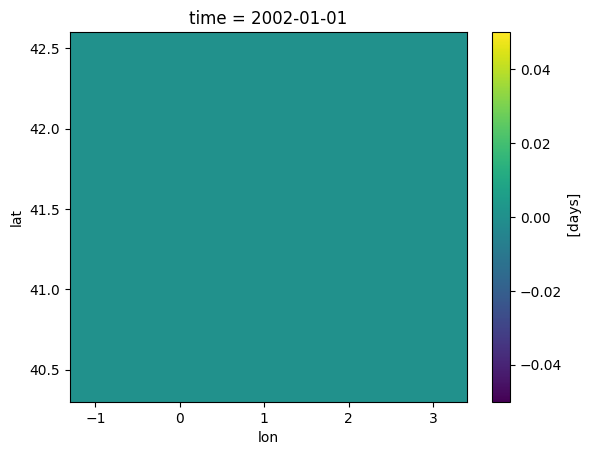

In [11]:
hw.sel(time='2002').plot()

In [12]:
min_val = hw.where(hw != 0).min()
print(min_val.item()) 

3.0


In [42]:
hw.mean(dim='time').to_netcdf(f"{outpath}Heatwave_length_Catalonia_1990_2005_mean.nc")


In [13]:
hw.to_netcdf(f"{outpath}Heatwave_length_Catalonia_1990_2005.nc")
